# bagging和随机森林

In [18]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [19]:
wine = load_wine()#使用葡萄酒数据集
print(f"所有特征：{wine.feature_names}")
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

所有特征：['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [20]:
#构建并训练决策树分类器，这里特征选择标准使用基尼指数，树的最大深度为1
base_model = DecisionTreeClassifier(max_depth=1, criterion='gini',random_state=1).fit(X_train, y_train)
y_pred = base_model.predict(X_test)#对训练集进行预测
print(f"决策树的准确率：{accuracy_score(y_test,y_pred):.3f}")


决策树的准确率：0.694


## bagging

In [21]:
from sklearn.ensemble import BaggingClassifier
# 建立AdaBoost分类器，每个基本分类模型为前面训练的决策树模型，最大的弱学习器的个数为50
model = BaggingClassifier(base_estimator=base_model,
                            n_estimators=50,
                            random_state=1)
model.fit(X_train, y_train)# 训练
y_pred = model.predict(X_test)# 预测
print(f"BaggingClassifier的准确率：{accuracy_score(y_test,y_pred):.3f}")

BaggingClassifier的准确率：0.917


## 测试估计器个数的影响

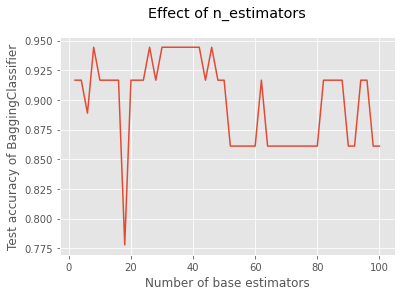

In [22]:
x = list(range(2, 102, 2))# 估计器个数即n_estimators，在这里我们取[2,102]的偶数
y = []

for i in x:
    model = BaggingClassifier(base_estimator=base_model,
                              n_estimators=i,
                              
                              random_state=1)
  
    model.fit(X_train, y_train)
    model_test_sc = accuracy_score(y_test, model.predict(X_test))
    y.append(model_test_sc)

plt.style.use('ggplot')
plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of BaggingClassifier")
plt.plot(x, y)
plt.show()

## 随机森林

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
                            n_estimators=50,
                            random_state=1)
model.fit(X_train, y_train)# 训练
y_pred = model.predict(X_test)# 预测
print(f"RandomForestClassifier的准确率：{accuracy_score(y_test,y_pred):.3f}")

RandomForestClassifier的准确率：0.972


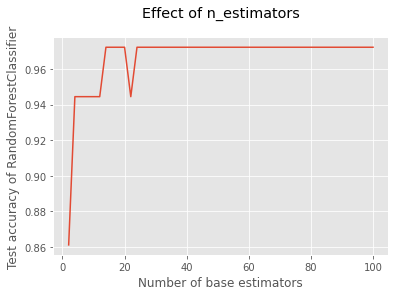

In [24]:
x = list(range(2, 102, 2))# 估计器个数即n_estimators，在这里我们取[2,102]的偶数
y = []

for i in x:
    model = RandomForestClassifier(
                              n_estimators=i,
                              
                              random_state=1)
  
    model.fit(X_train, y_train)
    model_test_sc = accuracy_score(y_test, model.predict(X_test))
    y.append(model_test_sc)

plt.style.use('ggplot')
plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of RandomForestClassifier")
plt.plot(x, y)
plt.show()